
1. Get dataset description.
2. Generate histograms.
3. Check for null values.
4. Check for zero values.
5. Preprocess the data and train the model.
6. Preprocess the data, train all modesl and compare.
0. Exit.


By using numbers on your keyboard, provide the option you want:  1



Dataset description:
                 count      mean       std     min     25%     50%     75%      max
length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
whole_weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
shucked_weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
viscera_weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
shell_weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
rings           4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000
---------------------------------------------

1. Get dataset description.
2. Generate histograms.
3. Check for null values.
4. Check for zero values.
5. Preprocess the data and train the model.
6. Preprocess the data, tra

By using numbers on your keyboard, provide the option you want:  2

Do you want to show histograms on the screen before saving? [y/n]:  y


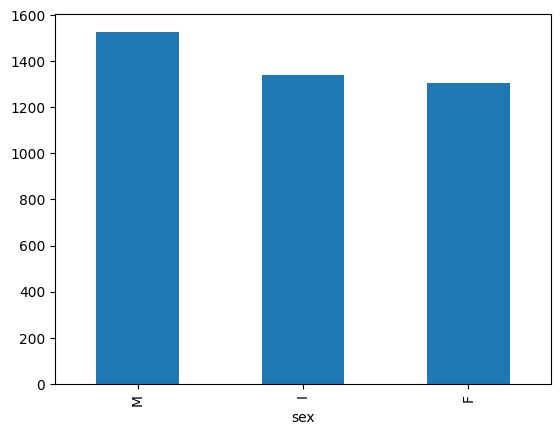

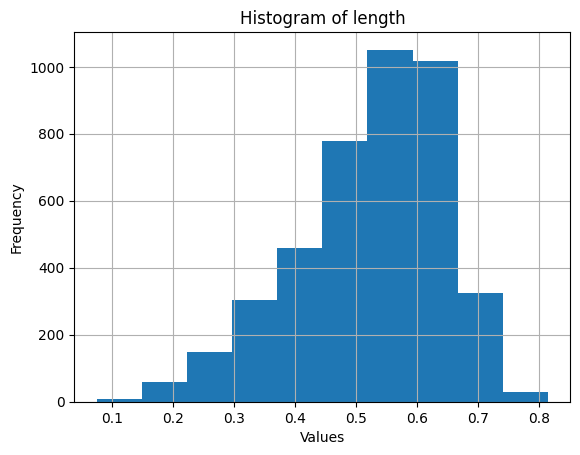

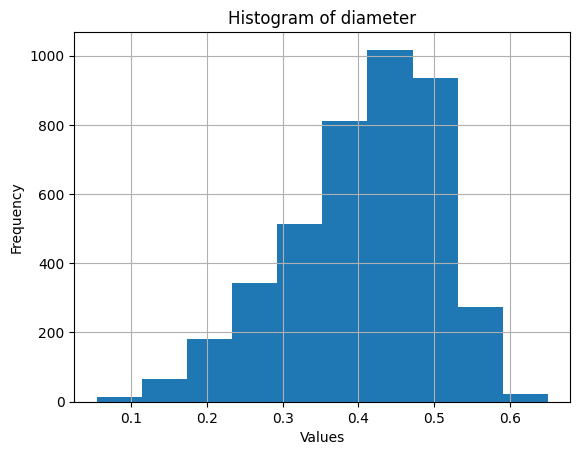

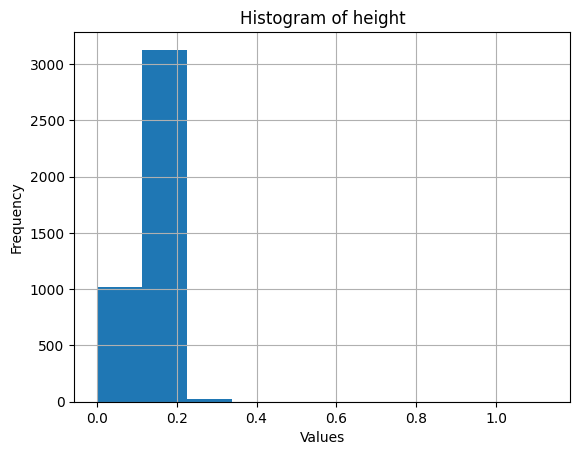

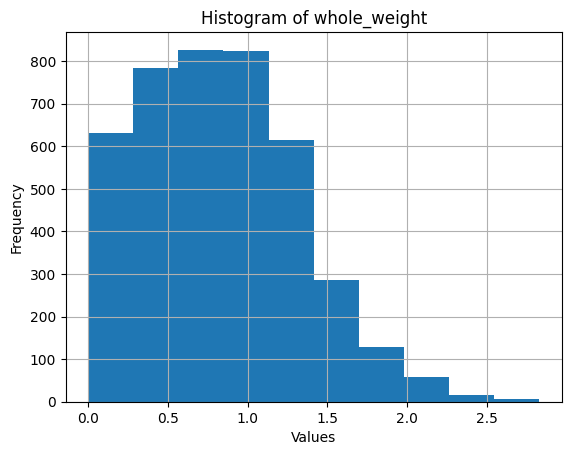

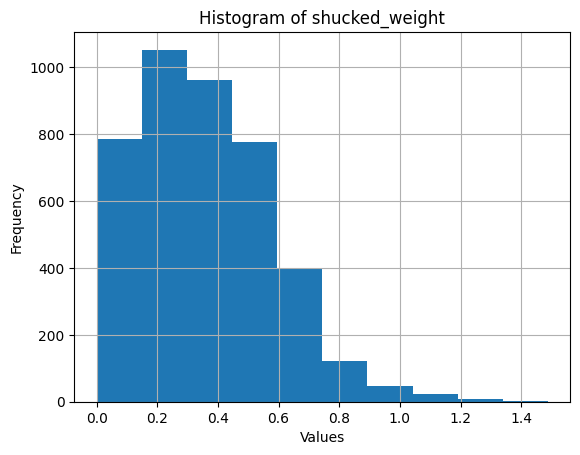

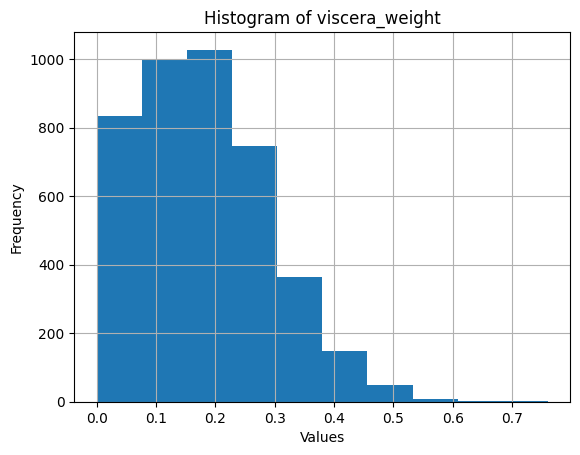

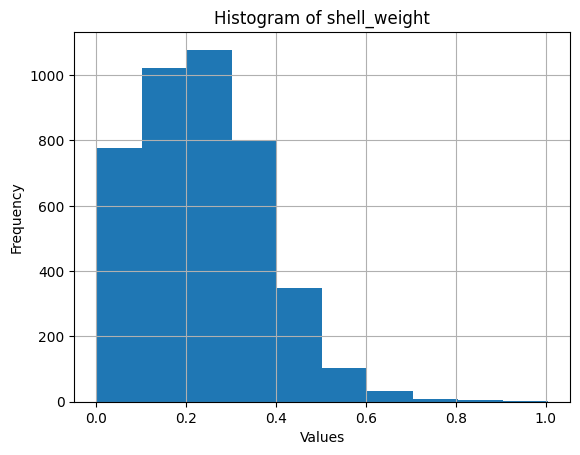

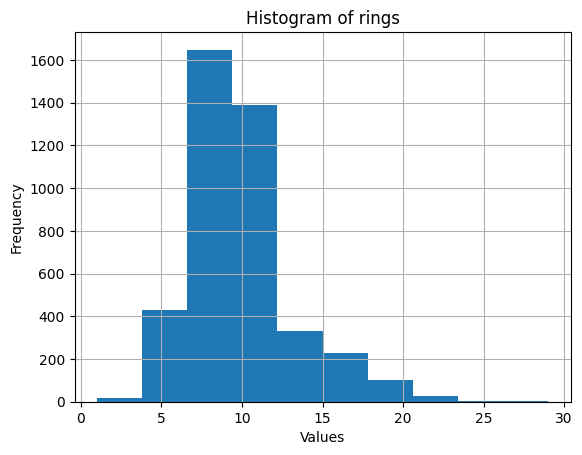


1. Get dataset description.
2. Generate histograms.
3. Check for null values.
4. Check for zero values.
5. Preprocess the data and train the model.
6. Preprocess the data, train all modesl and compare.
0. Exit.


By using numbers on your keyboard, provide the option you want:  3



There are no null values.

1. Get dataset description.
2. Generate histograms.
3. Check for null values.
4. Check for zero values.
5. Preprocess the data and train the model.
6. Preprocess the data, train all modesl and compare.
0. Exit.


By using numbers on your keyboard, provide the option you want:  4



Name of the attribute: length
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

-------

Name of the attribute: diameter
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

-------

Name of the attribute: height
Amount of records with zeros: 2
     sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  shell_weight  rings
1257   I   0.430      0.34     0.0         0.428          0.2065          0.0860        0.1150      8
3996   I   0.315      0.23     0.0         0.134          0.0575          0.0285        0.3505      6

-------

Name of the attribute: whole_weight
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

----

By using numbers on your keyboard, provide the option you want:  6

Provide the train set size:  0.2
Provide the random state seeder:  42



######## STARTING PREPROCESSING ########

Checking attributes that contain zeros

Name of the attribute: length
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

-------

Name of the attribute: diameter
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings]
Index: []

-------

Name of the attribute: height
Amount of records with zeros: 2
     sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  shell_weight  rings
1257   I   0.430      0.34     0.0         0.428          0.2065          0.0860        0.1150      8
3996   I   0.315      0.23     0.0         0.134          0.0575          0.0285        0.3505      6

-------

Name of the attribute: whole_weight
Amount of records with zeros: 0
Empty DataFrame
Columns: [sex, length, diameter, height, 

By using numbers on your keyboard, provide the option you want:  0



Bye, see ya!


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('expand_frame_repr', False)

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

names = [
    'sex',
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings',
]

'''
Reading data
'''
data = pd.read_csv('abalone/abalone.data', names=names)


'''
Print all available options in the interactive menu
'''
def print_available_options():
    print('\n1. Get dataset description.')
    print('2. Generate histograms.')
    print('3. Check for null values.')
    print('4. Check for zero values.')
    print('5. Preprocess the data and train the model.')
    print('6. Preprocess the data, train all modesl and compare.')
    print('0. Exit.')


'''
Print all available options in terms of preprocessing
'''
def print_preprocessing_options():
    print('\n1. Standardization')
    print('2. Normalization')
    print('3. Nothing')


'''
Print all available models for training
'''
def print_available_models():
    print('\n1. Linear regression')
    print('2. MLP regression')
    print('3. Support vector regression')
    print('4. Decision tree regression')
    print('5. Random forest regression')
    print('6. Gradient boosting regression')


'''
Helper function to replace names and print in pretty format
'''
def replace_algorithm_name(algorithm_name):
    if algorithm_name == 'linear':
        return 'Linear Regression'
    elif algorithm_name == 'mlp':
        return 'MLP Regression'
    elif algorithm_name == 'svr':
        return 'Support Vector Regression'
    elif algorithm_name == 'dc':
        return 'Decision Tree'
    elif algorithm_name == 'rf':
        return 'Random Forest'
    elif algorithm_name == 'gb':
        return 'Gradient Boosting'


'''
STANDARDIZATION
'''
def standardization(x_train, x_test):
    std_scaler = StandardScaler()
    x_train_scaled = std_scaler.fit_transform(x_train)
    x_test_scaled = std_scaler.transform(x_test)
    return x_train_scaled, x_test_scaled


'''
NORMALIZATION
'''
def normalization(x_train, x_test):
    norm_scaler = MinMaxScaler()
    norm_scaler.fit(x_train)
    x_train_scaled = norm_scaler.transform(x_train)
    x_test_scaled = norm_scaler.transform(x_test)
    return x_train_scaled, x_test_scaled


'''
LINEAR REGRESSION
'''
def linear_regression(x_train, y_train, x_test, y_test):
    lr = LinearRegression()

    lr.fit(x_train, y_train)
    
    y_pred = lr.predict(x_test)
    
    mae_linear_regression = mean_absolute_error(y_test, y_pred)
    mse_linear_regression = mean_squared_error(y_test, y_pred)
    rmse_linear_regression = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_linear_regression = r2_score(y_test, y_pred)
    
    print(f'\nMAE - Linear Regression: {mae_linear_regression}')
    print(f'MSE - Linear Regression: {mse_linear_regression}')
    print(f'RMSE - Linear Regression: {rmse_linear_regression}')
    print(f'R2 - Linear Regression: {r2_linear_regression}')
    
    return {
        'mae': mae_linear_regression,
        'mse': mse_linear_regression,
        'rmse': rmse_linear_regression,
        'r2': r2_linear_regression
    }


'''
MLP REGRESSION
'''
def mlp_regression(x_train, y_train, x_test, y_test):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    
    mlp_regressor.fit(x_train, y_train)
    
    y_pred = mlp_regressor.predict(x_test)
    
    mae_mlp = mean_absolute_error(y_test, y_pred)
    mse_mlp = mean_squared_error(y_test, y_pred)
    rmse_mlp = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_mlp = r2_score(y_test, y_pred)
    
    print(f'\nMAE - MLP Regression: {mae_mlp}')
    print(f'MSE - MLP Regression: {mse_mlp}')
    print(f'RMSE - MLP Regression: {rmse_mlp}')
    print(f'R2 - MLP Regression: {r2_mlp}')
    
    return {
        'mae': mae_mlp,
        'mse': mse_mlp,
        'rmse': rmse_mlp,
        'r2': r2_mlp
    }


'''
SUPPORT VECTOR REGRESSION
'''
def svr(x_train, y_train, x_test, y_test):
    svm = SVR()

    svm.fit(x_train, y_train)
    
    y_pred = svm.predict(x_test)
    
    mae_svm = mean_absolute_error(y_test, y_pred)
    mse_svm = mean_squared_error(y_test, y_pred)
    rmse_svm = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_svm = r2_score(y_test, y_pred)
    
    print(f'\nMAE - Support Vector Regression: {mae_svm}')
    print(f'MSE - Support Vector Regression: {mse_svm}')
    print(f'RMSE - Support Vector Regression: {rmse_svm}')
    print(f'R2 - Support Vector Regression: {r2_svm}')
    
    return {
        'mae': mae_svm,
        'mse': mse_svm,
        'rmse': rmse_svm,
        'r2': r2_svm
    }


'''
DECISION TREE REGRESSION
'''
def decision_tree_regression(x_train, y_train, x_test, y_test):
    dc = DecisionTreeRegressor(random_state=42)

    dc.fit(x_train, y_train)
    
    y_pred = dc.predict(x_test)
    
    mae_dc = mean_absolute_error(y_test, y_pred)
    mse_dc = mean_squared_error(y_test, y_pred)
    rmse_dc = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_dc = r2_score(y_test, y_pred)
    
    print(f'\nMAE - Decision Tree: {mae_dc}')
    print(f'MSE - Decision Tree: {mse_dc}')
    print(f'RMSE - Decision Tree: {rmse_dc}')
    print(f'R2 - Decision Tree: {r2_dc}')
    
    return {
        'mae': mae_dc,
        'mse': mse_dc,
        'rmse': rmse_dc,
        'r2': r2_dc
    }


'''
RANDOM FOREST REGRESSION
'''
def random_forest_regression(x_train, y_train, x_test, y_test):
    rf = RandomForestRegressor()

    rf.fit(x_train, y_train)
    
    y_pred = rf.predict(x_test)
    
    mae_rf = mean_absolute_error(y_test, y_pred)
    mse_rf = mean_squared_error(y_test, y_pred)
    rmse_rf = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_rf = r2_score(y_test, y_pred)
    
    print(f'\nMAE - Random Forest: {mae_rf}')
    print(f'MSE - Random Forest: {mse_rf}')
    print(f'RMSE - Random Forest: {rmse_rf}')
    print(f'R2 - Random Forest: {r2_rf}')
    
    return {
        'mae': mae_rf,
        'mse': mse_rf,
        'rmse': rmse_rf,
        'r2': r2_rf
    }


'''
GRADIENT BOOSTING REGRESSION
'''
def gradient_boosting_regression(x_train, y_train, x_test, y_test):
    gbr = GradientBoostingRegressor()

    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    
    mae_gbr = mean_absolute_error(y_test, y_pred)
    mse_gbr = mean_squared_error(y_test, y_pred)
    rmse_gbr = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2_gbr = r2_score(y_test, y_pred)
    
    print(f'\nMAE - Gradient Boosting: {mae_gbr}')
    print(f'MSE - Gradient Boosting: {mse_gbr}')
    print(f'RMSE - Gradient Boosting: {rmse_gbr}')
    print(f'R2 - Gradient Boosting: {r2_gbr}')

    return {
        'mae': mae_gbr,
        'mse': mse_gbr,
        'rmse': rmse_gbr,
        'r2': r2_gbr
    }


'''
This function helps to find the lowest possible
error per one model
'''
def find_lowest_error_per_model(errors):
    min_key = min(errors, key=errors.get)
    min_value = errors[min_key]

    return min_key, min_value


'''
This function helps to find the highest possible
error per one model
'''
def find_highest_error_per_model(errors):
    min_key = max(errors, key=errors.get)
    min_value = errors[min_key]

    return min_key, min_value


'''
This function is used during preprocessing and allows to
find and delete all outliers using interquartile range
'''
def find_and_delete_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
    
    return df[~outliers_mask]


'''
Generates and optionally shows histograms of all attributes
(both numerical and categorical)
'''
def generate_histograms(show=False):
    '''
    The sex attribute is a categorical attribute, so we need to transform it
    '''
    data['sex'].value_counts().plot.bar()
    data.sex.value_counts().plot.bar()
    plt.savefig(f'abalone/pics/hist_sex.png')

    if show:
        plt.show()

    '''
    Generating charts for all numeric attributes (except the sex attribute)
    '''
    for name in names[1:]:
        data.hist(column=name)
        plt.title(f'Histogram of {name}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        
        plt.savefig(f'abalone/pics/hist_{name}.png')

        if show:
            plt.show()


'''
Shows default description of the dataset
'''
def get_dataset_description():
    print('\nDataset description:')
    print(data.describe().T)
    print('---------------------------------------------')


'''
Checks for null values
'''
def check_for_null_values():
    if len(data.isnull()) == len(data):
        print('\nThere are no null values.')
    else:
        print('\nThere are null values.')


'''
Checks for zero values
'''
def check_for_zero_values(return_values=True):
    attributes_with_zeros = []
    
    for name in names[1:]:
        print(f'\nName of the attribute: {name}')
        print(f'Amount of records with zeros: {len(data[data[name] == 0])}')
        print(data[data[name] == 0])
        print('\n-------')
        
        if return_values and len(data[data[name] == 0]) > 0:
            attributes_with_zeros.append(name)

    if return_values:
        return attributes_with_zeros
            


def preprocess_data(data, train_size=0.2, random_state=42):
    '''
    All numerical attributes that we are working with cannot equal 0.
    Therefore, we need to check where we have these 0 and replace it with means of this attribute.
    '''

    print('\n######## STARTING PREPROCESSING ########')

    print('\nChecking attributes that contain zeros')

    attributes_with_zeros = check_for_zero_values()

    for attribute_with_zeros in attributes_with_zeros:
        data_attr_not_zero = data[data[attribute_with_zeros] > 0]
    
        data_height_not_zero = data[data[attribute_with_zeros] > 0]
        means = pd.pivot_table(data_height_not_zero, index=['sex'], aggfunc={attribute_with_zeros: np.mean})

        '''
        In this case value is hardcoded because we know for what sex
        the value is going to be 0 and what we need to select.
        '''
        mean_to_replace = means.at['I', attribute_with_zeros]
        data[attribute_with_zeros] = data[attribute_with_zeros].replace(to_replace=0, value=mean_to_replace)

    '''
    This line of code is responsible for getting and deleting all outliers.
    Check the documentation to this function to get more information.
    '''
    data = find_and_delete_outliers(data)
    
    print('\nData without outliers:')
    print(data.describe().T)

    print('\n---------------------------------------------')
    print('\nBefore transformation:')
    print(data.head()['sex'])

    '''
    Transformation of categorical data to numerical data
    '''
    sex_attribute_only = data['sex']
    lbe = LabelEncoder()
    data['sex'] = lbe.fit_transform(sex_attribute_only)

    print('\n---------------------------------------------')
    print('\nAfter transformation:')
    print(data.head()['sex'])

    print('\n######## FINISHING PREPROCESSING ########')

    '''
    Label (what we are trying to predict) and estimators (the rest of attributes)
    '''
    label = data['rings']
    estimators = data.drop('rings', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(estimators, label, train_size=train_size, random_state=random_state)

    return X_train, X_test, y_train, y_test


'''
Interactive menu helper functions
'''


def handle_histograms():
    show_histograms = input('\nDo you want to show histograms on the screen before saving? [y/n]: ').strip()
    
    if show_histograms == 'y':
        generate_histograms(show=True)
    elif show_histograms == 'n':
        generate_histograms(show=False)
    else:
        print('Wrong answer, try again.')


def handle_data_preprocessing(data):
    train_size = float(input('\nProvide the train set size: ').strip())
    random_state = int(input('Provide the random state seeder: ').strip())

    X_train, X_test, y_train, y_test = preprocess_data(data, train_size, random_state)
    train_model(X_train, X_test, y_train, y_test)


def preprocess_train_and_compare(data):
    train_size = float(input('\nProvide the train set size: ').strip())
    random_state = int(input('Provide the random state seeder: ').strip())

    X_train, X_test, y_train, y_test = preprocess_data(data, train_size, random_state)
    train_and_compare_models(X_train, X_test, y_train, y_test)


def train_model(X_train, X_test, y_train, y_test):
    print_preprocessing_options()
    preprocessing_option = input('Select the preprocessing option: ').strip()

    if preprocessing_option == '1':
        x_train_scaled, x_test_scaled = standardization(X_train, X_test)
        X_train = x_train_scaled
        X_test = x_test_scaled
    elif preprocessing_option == '2':
        x_train_scaled, x_test_scaled = normalization(X_train, X_test)
        X_train = x_train_scaled
        X_test = x_test_scaled
    elif preprocessing_option == '3':
        pass
    else:
        print('You have select the wrong preprocessing option, please try again.')
        return

    print_available_models()
    model_option = input('Select the model you want to use: ').strip()

    if model_option == '1':
        linear_regression(X_train, y_train, X_test, y_test)
    elif model_option == '2':
        mlp_regression(X_train, y_train, X_test, y_test)
    elif model_option == '3':
        svr(X_train, y_train, X_test, y_test)
    elif model_option == '4':
        decision_tree_regression(X_train, y_train, X_test, y_test)
    elif model_option == '5':
        random_forest_regression(X_train, y_train, X_test, y_test)
    elif model_option == '6':
        gradient_boosting_regression(X_train, y_train, X_test, y_test)
    else:
        print('You have selected the wrong model option, please try again.')
        return


def train_and_compare_models(X_train, X_test, y_train, y_test):
    x_train_scaled_std, x_test_scaled_std = standardization(X_train, X_test)
    x_train_scaled_norm, x_test_scaled_norm = normalization(X_train, X_test)

    '''
    Without standartization and normalization
    '''
    print('\n############ WITHOUT STANDARTIZATION AND NORMALIZATION ############')
    
    linear_regression_errors = linear_regression(X_train, y_train, X_test, y_test)
    mlp_regression_errors = mlp_regression(X_train, y_train, X_test, y_test)    
    svr_errors = svr(X_train, y_train, X_test, y_test)    
    decision_tree_regression_errors = decision_tree_regression(X_train, y_train, X_test, y_test)    
    random_forest_regression_errors = random_forest_regression(X_train, y_train, X_test, y_test)    
    gradient_boosting_regression_errors = gradient_boosting_regression(X_train, y_train, X_test, y_test)

    mae_errors = {
        'mae_linear': linear_regression_errors['mae'],
        'mae_mlp': mlp_regression_errors['mae'],
        'mae_svr': svr_errors['mae'],
        'mae_dc': decision_tree_regression_errors['mae'],
        'mae_rf': random_forest_regression_errors['mae'],
        'mae_gb': gradient_boosting_regression_errors['mae']
    }
    mse_errors = {
        'mse_linear': linear_regression_errors['mse'],
        'mse_mlp': mlp_regression_errors['mse'],
        'mse_svr': svr_errors['mse'],
        'mse_dc': decision_tree_regression_errors['mse'],
        'mse_rf': random_forest_regression_errors['mse'],
        'mse_gb': gradient_boosting_regression_errors['mse']
    }
    rmse_errors = {
        'rmse_linear': linear_regression_errors['rmse'],
        'rmse_mlp': mlp_regression_errors['rmse'],
        'rmse_svr': svr_errors['rmse'],
        'rmse_dc': decision_tree_regression_errors['rmse'],
        'rmse_rf': random_forest_regression_errors['rmse'],
        'rmse_gb': gradient_boosting_regression_errors['rmse']
    }
    r2_errors = {
        'r2_linear': linear_regression_errors['r2'],
        'r2_mlp': mlp_regression_errors['r2'],
        'r2_svr': svr_errors['r2'],
        'r2_dc': decision_tree_regression_errors['r2'],
        'r2_rf': random_forest_regression_errors['r2'],
        'r2_gb': gradient_boosting_regression_errors['r2']
    }

    lowest_mae_errors_key, lowest_mae_errors_value = find_lowest_error_per_model(mae_errors)
    lowest_mse_errors_key, lowest_mse_errors_value = find_lowest_error_per_model(mse_errors)
    lowest_rmse_errors_key, lowest_rmse_errors_value = find_lowest_error_per_model(rmse_errors)
    highest_r2_errors_key, highest_r2_errors_value = find_highest_error_per_model(r2_errors)

    lowest_mae_error_alg = replace_algorithm_name(lowest_mae_errors_key.split('_')[1])
    lowest_mse_error_alg = replace_algorithm_name(lowest_mse_errors_key.split('_')[1])
    lowest_rmse_error_alg = replace_algorithm_name(lowest_rmse_errors_key.split('_')[1])
    highest_r2_score_alg = replace_algorithm_name(highest_r2_errors_key.split('_')[1])
    
    print(f'\nLowest MAE error: {lowest_mae_errors_value} ({lowest_mae_error_alg})')
    print(f'Lowest MSE error: {lowest_mse_errors_value} ({lowest_mse_error_alg})')
    print(f'Lowest RMSE error: {lowest_rmse_errors_value} ({lowest_rmse_error_alg})')
    print(f'Highest R2 score: {highest_r2_errors_value} ({highest_r2_score_alg})')

    print('\n---------------------------------------------')

    '''
    With standartization
    '''
    print('\n############ WITH STANDARTIZATION ############')
    
    linear_regression_errors = linear_regression(x_train_scaled_std, y_train, x_test_scaled_std, y_test)
    mlp_regression_errors = mlp_regression(x_train_scaled_std, y_train, x_test_scaled_std, y_test)
    svr_errors = svr(x_train_scaled_std, y_train, x_test_scaled_std, y_test)
    decision_tree_regression_errors = decision_tree_regression(x_train_scaled_std, y_train, x_test_scaled_std, y_test)
    random_forest_regression_errors = random_forest_regression(x_train_scaled_std, y_train, x_test_scaled_std, y_test)
    gradient_boosting_regression_errors = gradient_boosting_regression(x_train_scaled_std, y_train, x_test_scaled_std, y_test)

    mae_errors = {
        'mae_linear': linear_regression_errors['mae'],
        'mae_mlp': mlp_regression_errors['mae'],
        'mae_svr': svr_errors['mae'],
        'mae_dc': decision_tree_regression_errors['mae'],
        'mae_rf': random_forest_regression_errors['mae'],
        'mae_gb': gradient_boosting_regression_errors['mae']
    }
    mse_errors = {
        'mse_linear': linear_regression_errors['mse'],
        'mse_mlp': mlp_regression_errors['mse'],
        'mse_svr': svr_errors['mse'],
        'mse_dc': decision_tree_regression_errors['mse'],
        'mse_rf': random_forest_regression_errors['mse'],
        'mse_gb': gradient_boosting_regression_errors['mse']
    }
    rmse_errors = {
        'rmse_linear': linear_regression_errors['rmse'],
        'rmse_mlp': mlp_regression_errors['rmse'],
        'rmse_svr': svr_errors['rmse'],
        'rmse_dc': decision_tree_regression_errors['rmse'],
        'rmse_rf': random_forest_regression_errors['rmse'],
        'rmse_gb': gradient_boosting_regression_errors['rmse']
    }
    r2_errors = {
        'r2_linear': linear_regression_errors['r2'],
        'r2_mlp': mlp_regression_errors['r2'],
        'r2_svr': svr_errors['r2'],
        'r2_dc': decision_tree_regression_errors['r2'],
        'r2_rf': random_forest_regression_errors['r2'],
        'r2_gb': gradient_boosting_regression_errors['r2']
    }

    lowest_mae_errors_key, lowest_mae_errors_value = find_lowest_error_per_model(mae_errors)
    lowest_mse_errors_key, lowest_mse_errors_value = find_lowest_error_per_model(mse_errors)
    lowest_rmse_errors_key, lowest_rmse_errors_value = find_lowest_error_per_model(rmse_errors)
    highest_r2_errors_key, highest_r2_errors_value = find_highest_error_per_model(r2_errors)

    lowest_mae_error_alg = replace_algorithm_name(lowest_mae_errors_key.split('_')[1])
    lowest_mse_error_alg = replace_algorithm_name(lowest_mse_errors_key.split('_')[1])
    lowest_rmse_error_alg = replace_algorithm_name(lowest_rmse_errors_key.split('_')[1])
    highest_r2_score_alg = replace_algorithm_name(highest_r2_errors_key.split('_')[1])
    
    print(f'\nLowest MAE error: {lowest_mae_errors_value} ({lowest_mae_error_alg})')
    print(f'Lowest MSE error: {lowest_mse_errors_value} ({lowest_mse_error_alg})')
    print(f'Lowest RMSE error: {lowest_rmse_errors_value} ({lowest_rmse_error_alg})')
    print(f'Highest R2 score: {highest_r2_errors_value} ({highest_r2_score_alg})')

    print('\n---------------------------------------------')
    
    '''
    With normalization
    '''
    print('\n############ WITH NORMALIZATION ############')
    
    linear_regression_errors = linear_regression(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)
    mlp_regression_errors = mlp_regression(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)
    svr_errors = svr(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)
    decision_tree_regression_errors = decision_tree_regression(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)
    random_forest_regression_errors = random_forest_regression(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)
    gradient_boosting_regression_errors = gradient_boosting_regression(x_train_scaled_norm, y_train, x_test_scaled_norm, y_test)

    mae_errors = {
        'mae_linear': linear_regression_errors['mae'],
        'mae_mlp': mlp_regression_errors['mae'],
        'mae_svr': svr_errors['mae'],
        'mae_dc': decision_tree_regression_errors['mae'],
        'mae_rf': random_forest_regression_errors['mae'],
        'mae_gb': gradient_boosting_regression_errors['mae']
    }
    mse_errors = {
        'mse_linear': linear_regression_errors['mse'],
        'mse_mlp': mlp_regression_errors['mse'],
        'mse_svr': svr_errors['mse'],
        'mse_dc': decision_tree_regression_errors['mse'],
        'mse_rf': random_forest_regression_errors['mse'],
        'mse_gb': gradient_boosting_regression_errors['mse']
    }
    rmse_errors = {
        'rmse_linear': linear_regression_errors['rmse'],
        'rmse_mlp': mlp_regression_errors['rmse'],
        'rmse_svr': svr_errors['rmse'],
        'rmse_dc': decision_tree_regression_errors['rmse'],
        'rmse_rf': random_forest_regression_errors['rmse'],
        'rmse_gb': gradient_boosting_regression_errors['rmse']
    }
    r2_errors = {
        'r2_linear': linear_regression_errors['r2'],
        'r2_mlp': mlp_regression_errors['r2'],
        'r2_svr': svr_errors['r2'],
        'r2_dc': decision_tree_regression_errors['r2'],
        'r2_rf': random_forest_regression_errors['r2'],
        'r2_gb': gradient_boosting_regression_errors['r2']
    }

    lowest_mae_errors_key, lowest_mae_errors_value = find_lowest_error_per_model(mae_errors)
    lowest_mse_errors_key, lowest_mse_errors_value = find_lowest_error_per_model(mse_errors)
    lowest_rmse_errors_key, lowest_rmse_errors_value = find_lowest_error_per_model(rmse_errors)
    highest_r2_errors_key, highest_r2_errors_value = find_highest_error_per_model(r2_errors)

    lowest_mae_error_alg = replace_algorithm_name(lowest_mae_errors_key.split('_')[1])
    lowest_mse_error_alg = replace_algorithm_name(lowest_mse_errors_key.split('_')[1])
    lowest_rmse_error_alg = replace_algorithm_name(lowest_rmse_errors_key.split('_')[1])
    highest_r2_score_alg = replace_algorithm_name(highest_r2_errors_key.split('_')[1])
    
    print(f'\nLowest MAE error: {lowest_mae_errors_value} ({lowest_mae_error_alg})')
    print(f'Lowest MSE error: {lowest_mse_errors_value} ({lowest_mse_error_alg})')
    print(f'Lowest RMSE error: {lowest_rmse_errors_value} ({lowest_rmse_error_alg})')
    print(f'Highest R2 score: {highest_r2_errors_value} ({highest_r2_score_alg})')
    print('\n---------------------------------------------')
    

'''
Interactive menu
'''
while True:
    print_available_options()
    user_input = input('By using numbers on your keyboard, provide the option you want: ').strip()

    if user_input == '1':
        get_dataset_description()
    elif user_input == '2':
        handle_histograms()
    elif user_input == '3':
        check_for_null_values()
    elif user_input == '4':
        check_for_zero_values(return_values=False)
    elif user_input == '5':
        handle_data_preprocessing(data)
    elif user_input == '6':
        preprocess_train_and_compare(data)
    elif user_input == '0':
        print('\nBye, see ya!')
        break
    else:
        print('\nLooks like it is the wrong option, try again :(')